In [1]:
install.packages("optimx")
install.packages("GA")
install.packages("GenSA")
install.packages("CEoptim")
library(optimx)


The downloaded binary packages are in
	/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T//Rtmp5EZDdN/downloaded_packages

The downloaded binary packages are in
	/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T//Rtmp5EZDdN/downloaded_packages

The downloaded binary packages are in
	/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T//Rtmp5EZDdN/downloaded_packages

The downloaded binary packages are in
	/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T//Rtmp5EZDdN/downloaded_packages


## Rastrigin Function
The Rastrigin function is a highly non-convex function with, well, infinite local minima. If your optimization algorithm is not stochastic and you would like to give it a nightmare, this is the function to use. If its stochastic then this is a good benchmark to test its performance.

As in Wikipedia, the Rastrigin function is defined as:
$$f(\vec{x}) = An + \sum_{i=1}^n (x_i^2 - A\cos(2\pi x_i))$$

where $x_i$ is the $i$-th element of the vector $x$ and $n$ is the dimension of the vector $x$. The cosine should explain why the function is non-convex. 

### Implementing the Rastrigin Function in 2D

In [2]:
Rastrigin <- function(x,y, n=2, A=5) A*2 + (x^2 - A*cos(2*pi*x)) + (y^2 - A*cos(2*pi*y))

### Now let's plot!

We will plot the function for all $x_i \in [-3, 3]$ and $y_i \in [-3, 3]$. Let's start by creating the ranges and outer() will help us with creating the grid.

In [3]:
# We will make a grid using these later via outer()
x<-seq(-3,3,length=50)
y<-seq(-3,3,length=50) 

To make guessing where the global minimum is easier, we will make three plots with different values of A

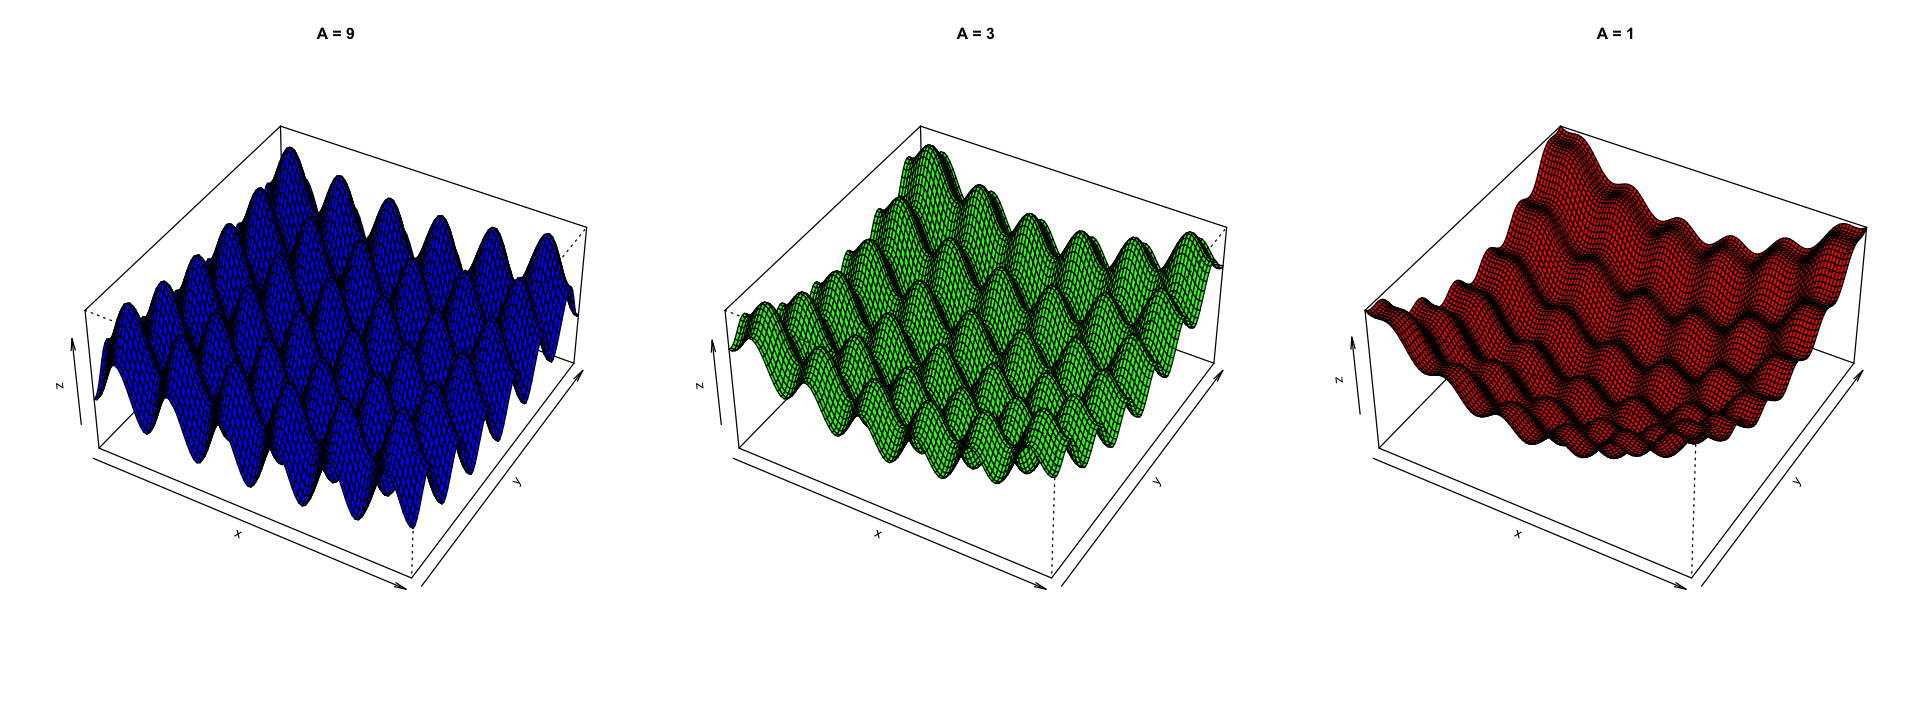

In [4]:
# Define a vector of A values
A_vec <- c(9, 3, 1)

# Define a vector of colors
colors <- c("blue", "green", "red")

# Setting up plot options to show three versions of the function
options(repr.plot.width=16, repr.plot.height=6)                           
par(mfrow=c(1,3), bg='white') 

# Now let's plot each
for (i in seq_along(A_vec)) {
  A <- A_vec[i]
  
  # An outer product yields all combinations we need to plug into the function to get the surface
  z <- outer(x, y, function(x,y) Rastrigin(x, y, A=A))
  
  # Plot it using persp
  persp(x, y, z, theta = 30, phi = 40, expand = 0.5, d = 5, col = colors[i], main = paste0("A = ", A))
}

It's obvious at this point that the global minimum is at $(x, y) = (0, 0)$. Indeed, when $x_i=0$, in general, the cosine becomes 1 in the sum making it evaluate to $nA$. 